In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy import optimize
import os

In [2]:
dlist = os.listdir('./')
dlist = [f for f in dlist if os.path.isdir(os.path.join('./', f))]
dlist.pop(0)
dlist

['DRD1_1',
 'DRD1_2',
 'HTR4_1',
 'HTR4_2',
 'HTR7_1',
 'HTR7_2',
 'MCS_DA',
 'MCS_Ser']

In [3]:
data = [np.load('./' +file + "/df.npz", allow_pickle=True) for file in dlist]

In [4]:
for i in range(data[0]['labels'].shape[0]):
    print(str(i) +': ' + str((data[0]['labels'][i])))

0: ['cyto' 'CFP' 'area']
1: ['cyto' 'CFP' 'cell_id']
2: ['cyto' 'CFP' 'convex_area']
3: ['cyto' 'CFP' 'cv_intensity']
4: ['cyto' 'CFP' 'eccentricity']
5: ['cyto' 'CFP' 'major_axis_length']
6: ['cyto' 'CFP' 'max_intensity']
7: ['cyto' 'CFP' 'mean_intensity']
8: ['cyto' 'CFP' 'median_intensity']
9: ['cyto' 'CFP' 'min_intensity']
10: ['cyto' 'CFP' 'minor_axis_length']
11: ['cyto' 'CFP' 'num_seg']
12: ['cyto' 'CFP' 'orientation']
13: ['cyto' 'CFP' 'parent']
14: ['cyto' 'CFP' 'perimeter']
15: ['cyto' 'CFP' 'solidity']
16: ['cyto' 'CFP' 'std_intensity']
17: ['cyto' 'CFP' 'total_intensity']
18: ['cyto' 'CFP' 'x']
19: ['cyto' 'CFP' 'y']
20: ['cyto' 'FRET' 'area']
21: ['cyto' 'FRET' 'cell_id']
22: ['cyto' 'FRET' 'convex_area']
23: ['cyto' 'FRET' 'cv_intensity']
24: ['cyto' 'FRET' 'eccentricity']
25: ['cyto' 'FRET' 'major_axis_length']
26: ['cyto' 'FRET' 'max_intensity']
27: ['cyto' 'FRET' 'mean_intensity']
28: ['cyto' 'FRET' 'median_intensity']
29: ['cyto' 'FRET' 'min_intensity']
30: ['cyto' 'F

Lower signal
CV > 10%
Lower signal
CV > 10%
CV > 10%
CV > 10%
CV > 10%
CV > 10%
CV > 10%
CV > 10%
CV > 10%
CV > 10%
Lower signal
CV > 10%
CV > 10%
Lower signal
Lower signal
Lower signal
Lower signal
Lower signal
Nan
Lower signal
Lower signal
Lower signal
CV > 10%
CV > 10%
CV > 10%
Lower signal
Lower signal
Lower signal
CV > 10%
Lower signal
CV > 10%
CV > 10%
Lower signal
CV > 10%
CV > 10%
CV > 10%
CV > 10%
Lower signal
Lower signal
Lower signal
CV > 10%
CV > 10%
Lower signal
Lower signal
CV > 10%
Lower signal
CV > 10%
Nan
Lower signal
CV > 10%
CV > 10%
CV > 10%
CV > 10%
Lower signal
CV > 10%
CV > 10%
CV > 10%
Lower signal
CV > 10%
Lower signal
CV > 10%
CV > 10%
Lower signal
Lower signal
Lower signal
Lower signal
Lower signal
Lower signal
CV > 10%
CV > 10%
CV > 10%
Lower signal
Lower signal
Lower signal
CV > 10%
Lower signal
CV > 10%
Lower signal
Lower signal
Lower signal
Lower signal
Lower signal
Nan
Lower signal
CV > 10%
Lower signal
Nan
Lower signal
Lower signal
Lower signal
Lower si

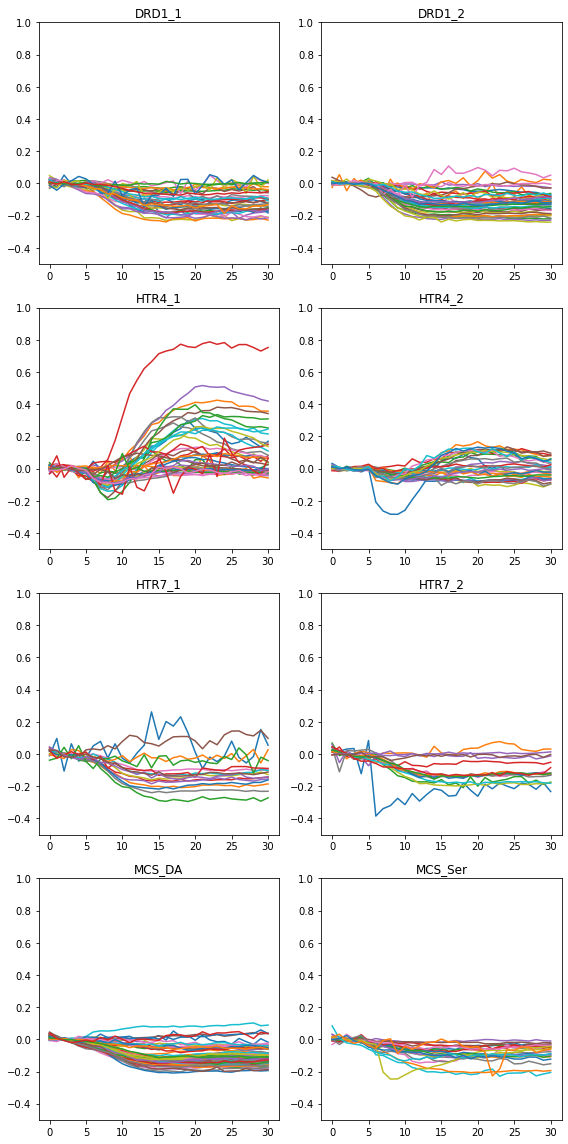

In [5]:
# ERK
ERK_max = []
ERK_basal =[]
plt.figure(figsize=(8,16))
for f, file in enumerate(dlist):
    plt.subplot(4,2,f+1)
    tmp_max = []
    tmp_basal = []
    for i in range(data[f]['arr'][67,:,:].shape[0]):
        if np.isnan(data[f]['arr'][27,i,:]).any() == True:
            print('Nan')
        elif np.mean(data[f]['arr'][27,i,:]) <100:
            print('Lower signal')
        elif np.std(data[f]['arr'][27,i,:])/ np.mean(data[f]['arr'][27,i,:]) >0.1:
            print('CV > 10%')
        else:
            tmp = data[f]['arr'][67,i,:]/ data[f]['arr'][147,i,:]
            tmp_basal.append(tmp[0])
            tmp = tmp/np.mean(tmp[0:5])-1
            plt.plot(tmp)
            plt.ylim(-0.5,1.0)
            tmp_max.append(np.max(tmp[6:]))
    ERK_max.append(tmp_max)
    ERK_basal.append(tmp_basal)
    plt.title(file)
plt.tight_layout()

In [ ]:
# cAMP
cAMP_max = []
plt.figure(figsize=(8,16))
for f, file in enumerate(dlist):
    plt.subplot(4,2,f+1)
    tmp_max = []
    for i in range(data[f]['arr'][27,:,:].shape[0]):
        if np.isnan(data[f]['arr'][27,i,:]).any() == True:
            print('Nan')
        elif np.mean(data[f]['arr'][27,i,:]) <100:
            print('Lower signal')
        elif np.std(data[f]['arr'][27,i,:])/ np.mean(data[f]['arr'][27,i,:]) >0.1:
            print('CV > 10%')
        else:
            tmp = data[f]['arr'][7,i,:]/ data[f]['arr'][27,i,:]
            tmp = tmp/np.mean(tmp[0:5])-1
            plt.plot(tmp)
            plt.ylim(-0.5,1.0)
            tmp_max.append(np.max(tmp[6:]))
    cAMP_max.append(tmp_max)
    plt.title(file)
plt.tight_layout()

Lower signal
CV > 10%
Lower signal
CV > 10%
CV > 10%
CV > 10%


In [ ]:
# cAMP_raw
cAMP_raw_max = []
cAMP_basal = []
plt.figure(figsize=(8,16))
for f, file in enumerate(dlist):
    plt.subplot(4,2,f+1)
    tmp_max = []
    tmp_basal = []
    for i in range(data[f]['arr'][27,:,:].shape[0]):
        if np.isnan(data[f]['arr'][27,i,:]).any() == True:
            print('Nan')
        elif np.mean(data[f]['arr'][27,i,:]) <100:
            print('Lower signal')
        elif np.std(data[f]['arr'][27,i,:])/ np.mean(data[f]['arr'][27,i,:]) >0.1:
            print('CV > 10%')
        else:
            tmp = data[f]['arr'][7,i,:]/ data[f]['arr'][27,i,:]
            plt.plot(tmp)
            plt.ylim(0.6,1.6)
            tmp_max.append(np.max(tmp[6:]))
            tmp_basal.append(np.mean(tmp[0:5]))
    cAMP_raw_max.append(tmp_max)
    cAMP_basal.append(tmp_basal)
    plt.title(file)
plt.tight_layout()

In [ ]:
# Data cleaning by FRET channel
plt.figure(figsize=(20,8))
for f, file in enumerate(dlist):
    plt.subplot(2,10,f+1)
    for i in range(data[f]['arr'][27,:,:].shape[0]):
        tmp = data[f]['arr'][27,i,:]
        plt.plot(tmp)
        plt.ylim(0,1500)
    plt.title(file)
    
plt.figure(figsize=(20,8))
for f, file in enumerate(dlist):
    plt.subplot(2,10,f+1)
    for i in range(data[f]['arr'][27,:,:].shape[0]):
        if np.isnan(data[f]['arr'][27,i,:]).any() == True:
            print('Nan')
        elif np.mean(data[f]['arr'][27,i,:]) <100:
            print('Lower signal')
        elif np.std(data[f]['arr'][27,i,:])/ np.mean(data[f]['arr'][27,i,:]) >0.1:
            print('CV > 10%')
        else:
            tmp = data[f]['arr'][27,i,:]
            plt.plot(tmp)
            plt.ylim(0,1500)
    plt.title(file +'_cleanup')

In [ ]:
plt.figure(figsize=(6,12))
for f, file in enumerate(dlist):
    plt.subplot(4,2,f+1)
    plt.scatter(ERK_max[f],cAMP_max[f],s=10)
    plt.xlabel('ERK_peak')
    plt.ylabel('cAMP_peak')
    plt.xlim(-0.1,0.25)
    plt.ylim(-0.1,0.8)
    plt.title(file)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(6,12))
for f, file in enumerate(dlist):
    plt.subplot(4,2,f+1)
    plt.scatter(ERK_basal[f],cAMP_basal[f],s=10)
    plt.xlabel('ERK_basal')
    plt.ylabel('cAMP_basal')
    plt.xlim(0.2,1.5)
    plt.ylim(0.5,1.4)
    plt.title(file)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(6,12))
for f, file in enumerate(dlist):
    plt.subplot(4,2,f+1)
    plt.scatter(cAMP_basal[f],ERK_max[f],s=10)
    plt.xlabel('cAMP_basal')
    plt.ylabel('ERK peak')
    plt.ylim(-0.1,0.25)
    plt.xlim(0.5,1.4)
    plt.title(file)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(6,12))
for f, file in enumerate(dlist):
    plt.subplot(4,2,f+1)
    plt.scatter(cAMP_basal[f],cAMP_raw_max[f],s=10)
    plt.xlabel('cAMP_basal')
    plt.ylabel('cAMP_peak (before normalize)')
    plt.xlim(0.5,1.2)
    plt.ylim(0.6,1.4)
    plt.title(file)
plt.tight_layout()

In [ ]:
ERK_norm, cAMP_norm, cAMP_raw = [], [], []

for f, file in enumerate(dlist):
    ERK_norm_tmp, cAMP_norm_tmp, cAMP_raw_tmp = [], [],[]
    for i in range(data[f]['arr'][67,:,:].shape[0]):
        if np.isnan(data[f]['arr'][27,i,:]).any() == True:
            print('Nan')
        elif np.mean(data[f]['arr'][27,i,:]) <100:
            print('Lower signal')
        elif np.std(data[f]['arr'][27,i,:])/ np.mean(data[f]['arr'][27,i,:]) >0.1:
            print('CV > 10%')
        else:
            tmp_ERK, tmp_cAMP = data[f]['arr'][67,i,:]/ data[f]['arr'][147,i,:], data[f]['arr'][7,i,:]/ data[f]['arr'][27,i,:]
            tmp_ERK, tmp_cAMP = tmp_ERK/np.mean(tmp_ERK[0:5])-1, tmp_cAMP/np.mean(tmp_cAMP[0:5])-1
            tmp_cAMP_raw = data[f]['arr'][7,i,:]/ data[f]['arr'][27,i,:]
        ERK_norm_tmp.append(tmp_ERK)
        cAMP_norm_tmp.append(tmp_cAMP)
        cAMP_raw_tmp.append(tmp_cAMP_raw)
        
    ERK_norm.append(ERK_norm_tmp)
    cAMP_norm.append(cAMP_norm_tmp)
    cAMP_raw.append(cAMP_raw_tmp)

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
sns.heatmap(ERK_norm[0]+ERK_norm[1], vmin=-0.2,vmax=0.4)
plt.title('DRD1 ERK normalize')
plt.subplot(1,3,2)
sns.heatmap(cAMP_norm[0]+cAMP_norm[1], vmin=0,vmax=1.0)
plt.title('DRD1 cAMP normalize')
plt.subplot(1,3,3)
sns.heatmap(cAMP_raw[0]+cAMP_raw[1], vmin=0.6,vmax=1.2)
plt.title('DRD1 cAMP')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
sns.heatmap(ERK_norm[2]+ERK_norm[3], vmin=-0.2,vmax=0.4)
plt.title('HTR4 ERK normalize')
plt.subplot(1,3,2)
sns.heatmap(cAMP_norm[2]+cAMP_norm[3], vmin=0,vmax=1.0)
plt.title('HTR4 cAMP normalize')
plt.subplot(1,3,3)
sns.heatmap(cAMP_raw[2]+cAMP_raw[3], vmin=0.6,vmax=1.2)
plt.title('HTR4 cAMP normalize')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
sns.heatmap(ERK_norm[4]+ERK_norm[5], vmin=-0.2,vmax=0.4)
plt.title('HTR7 ERK normalize')
plt.subplot(1,3,2)
sns.heatmap(cAMP_norm[4]+cAMP_norm[5], vmin=0,vmax=1.0)
plt.title('HTR7 cAMP normalize')
plt.subplot(1,3,3)
sns.heatmap(cAMP_raw[4]+cAMP_raw[5], vmin=0.6,vmax=1.2)
plt.title('HTR7 cAMP')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
sns.heatmap(ERK_norm[6], vmin=-0.2,vmax=0.4)
plt.title('Control_DA ERK normalize')
plt.subplot(1,3,2)
sns.heatmap(cAMP_norm[6], vmin=0,vmax=1.0)
plt.title('Control_DA cAMP normalize')
plt.subplot(1,3,3)
sns.heatmap(cAMP_raw[6], vmin=0.6,vmax=1.2)
plt.title('Control_DA cAMP')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
sns.heatmap(ERK_norm[7], vmin=-0.2,vmax=0.4)
plt.title('Control_5-HT ERK normalize')
plt.subplot(1,3,2)
sns.heatmap(cAMP_norm[7], vmin=0,vmax=1.0)
plt.title('Control_5-HT cAMP normalize')
plt.subplot(1,3,3)
sns.heatmap(cAMP_raw[7], vmin=0.6,vmax=1.2)
plt.title('Control_5-HT cAMP')
plt.tight_layout()
plt.show()